In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
%matplotlib inline

In [2]:
df1 = pd.read_csv('Outlet-l.csv') # Reading Data
df2 = pd.read_csv('Outlet-m.csv')
df3 = pd.read_csv('Outlet-n.csv')

df1 = df1.head(58489)
df2 = df2.head(63881)
df3 = df3.head(14874)

# Converting to datetime datatype
df1['TransactionDateTime1'] = pd.to_datetime(df1['TransactionDateTime1'], infer_datetime_format=True) 
df2['TransactionDateTime1'] = pd.to_datetime(df2['TransactionDateTime1'], infer_datetime_format=True)
df3['TransactionDateTime1'] = pd.to_datetime(df3['TransactionDateTime1'], infer_datetime_format=True)

c:\users\sid\appdata\local\programs\python\python38\lib\site-packages\IPython\core\interactiveshell.py:3169: DtypeWarning: Columns (12) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
# Grouping on Outlet Number, Pump Number, Transaction Hour and aggregating the Quantity
d1 = df1.groupby([df1['OutletNumber'], df1['PumpNumber1'], df1['TransactionDateTime1'].dt.hour]).agg({'Quantity1':'sum'})
d2 = df2.groupby([df2['OutletNumber'], df2['PumpNumber1'], df2['TransactionDateTime1'].dt.hour]).agg({'Quantity1':'sum'})
d3 = df3.groupby([df3['OutletNumber'], df3['PumpNumber1'], df3['TransactionDateTime1'].dt.hour]).agg({'Quantity1':'sum'})

frames = [d1, d2, d3]
d = pd.concat(frames) # Combining all the outlets

In [4]:
# Converting the transactions hour into columns via pivot table
p = d.pivot_table('Quantity1', ['OutletNumber', 'PumpNumber1'], 'TransactionDateTime1')

ph = d.pivot_table('Quantity1', ['OutletNumber', 'PumpNumber1'], 'TransactionDateTime1').reset_index()

p.replace(np.nan, 0.00, inplace = True) # Replacing the null values with 0.00
p.head()

TransactionDateTime1           0       1       2       3       4       5   \
OutletNumber PumpNumber1                                                    
Outlet-l     4               0.00    0.00    0.00    0.00    0.00    0.00   
             6            1026.02  516.73  173.09  165.31  114.78  221.69   
             7            1219.72  629.36  272.61  221.18  396.98  568.95   
             9             975.01  470.87  170.04   65.13  106.99  127.99   
             10             51.02   18.51    7.60    5.79   28.52   98.73   

TransactionDateTime1          6        7        8        9   ...       14  \
OutletNumber PumpNumber1                                     ...            
Outlet-l     4              0.00     0.00     0.00     0.00  ...     0.00   
             6            872.75  1974.06  2958.30  4421.99  ...  2218.26   
             7            895.44  1714.78  2648.52  4069.37  ...  2746.74   
             9            433.14  1399.41  2546.02  4169.23  ...  3728.07   
             10           146.66   237.13   319.19   224.15  ...   391.27   

TransactionDateTime1           15       16       17       18       19  \
OutletNumber PumpNumber1                                                
Outlet-l     4               0.00     0.00     1.11     0.00    67.50   
             6            1766.71  2108.83  3122.47  4397.88  4744.33   
             7            2460.40  2539.75  2747.55  3763.99  4138.72   
             9            2952.13  3446.39  4270.21  4439.83  4860.16   
             10            446.33   394.72   335.61   194.33   172.17   

TransactionDateTime1           20       21       22       23  
OutletNumber PumpNumber1                                      
Outlet-l     4               0.00     0.05     0.00     0.00  
             6            4101.01  3110.14  2577.45  2393.78  
             7            3442.55  2111.47  2136.78  1721.93  
             9            3524.34  3326.48  3403.83  3055.91  
             10             64.19   129.40   150.60   130.17  

[5 rows x 24 columns]

In [5]:
da = p.max(axis = 1).reset_index() # Retreiving the maximum volume of each pump 
da.columns = ['OutletNumber', 'PumpNumber1', 'Quantity1']

db = p.idxmax(axis = 1).reset_index() # Retreiving the hour at which the pump has maximum volume
db.columns =  ['OutletNumber', 'PumpNumber1', 'TransactionDateTime1']

c = pd.merge(da, db) # Merging the table of maximum volume of each pump and at what hour of all outlets 
c

,OutletNumber,PumpNumber1,Quantity1,TransactionDateTime1
0,Outlet-l,4,67.50,19
1,Outlet-l,6,4794.30,11
2,Outlet-l,7,4465.88,11
3,Outlet-l,9,5623.21,11
4,Outlet-l,10,449.14,13
5,Outlet-m,5,621.48,11
6,Outlet-m,8,1339.34,11
7,Outlet-m,9,1991.57,11
8,Outlet-m,12,2763.37,11
9,Outlet-m,13,2946.15,11


In [6]:
x = c.iloc[:, [1, 2, 3]].values
kmean = KMeans(n_clusters=3)
y_kmeans = kmean.fit_predict(x) # Categorised the clusters 
print(y_kmeans)
c['Category'] = y_kmeans
c

[1 0 0 0 1 1 1 2 2 2 2 2 2 0 1]


,OutletNumber,PumpNumber1,Quantity1,TransactionDateTime1,Category
0,Outlet-l,4,67.50,19,1
1,Outlet-l,6,4794.30,11,0
2,Outlet-l,7,4465.88,11,0
3,Outlet-l,9,5623.21,11,0
4,Outlet-l,10,449.14,13,1
5,Outlet-m,5,621.48,11,1
6,Outlet-m,8,1339.34,11,1
7,Outlet-m,9,1991.57,11,2
8,Outlet-m,12,2763.37,11,2
9,Outlet-m,13,2946.15,11,2


Text(0, 0.5, 'Error')

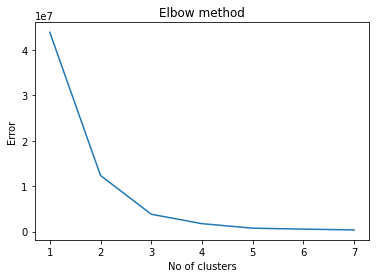

In [7]:
Error =[]
for i in range(1, 8):
    kmeans = KMeans(n_clusters = i).fit(x)
    kmeans.fit(x)
    Error.append(kmeans.inertia_)
plt.plot(range(1, 8), Error)
plt.title('Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('Error')
#plt.show()

Text(0, 0.5, 'Quantity')

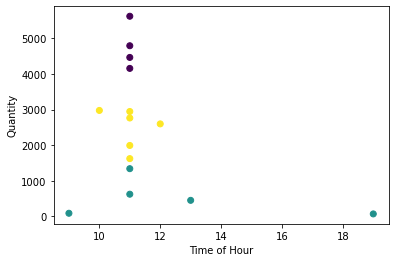

In [8]:
plt.scatter(x = c['TransactionDateTime1'], y = c['Quantity1'], c = y_kmeans) # clustered data plot
plt.xlabel('Time of Hour')
plt.ylabel('Quantity')

In [9]:
c.sort_values(['Quantity1'], ascending = False, inplace = True)
med = c['Quantity1'].median()
c

,OutletNumber,PumpNumber1,Quantity1,TransactionDateTime1,Category
3,Outlet-l,9,5623.21,11,0
1,Outlet-l,6,4794.30,11,0
2,Outlet-l,7,4465.88,11,0
13,Outlet-n,1,4157.53,11,0
12,Outlet-m,20,2975.77,10,2
9,Outlet-m,13,2946.15,11,2
8,Outlet-m,12,2763.37,11,2
11,Outlet-m,17,2597.96,12,2
7,Outlet-m,9,1991.57,11,2
10,Outlet-m,16,1622.01,11,2


In [10]:
c1 = c[c['Quantity1'] > med] 
c2 = c1.groupby([c['OutletNumber']])['OutletNumber'].count()
c2.idxmax(axis = 1)

'Outlet-l'

In [11]:
c

,OutletNumber,PumpNumber1,Quantity1,TransactionDateTime1,Category
3,Outlet-l,9,5623.21,11,0
1,Outlet-l,6,4794.30,11,0
2,Outlet-l,7,4465.88,11,0
13,Outlet-n,1,4157.53,11,0
12,Outlet-m,20,2975.77,10,2
9,Outlet-m,13,2946.15,11,2
8,Outlet-m,12,2763.37,11,2
11,Outlet-m,17,2597.96,12,2
7,Outlet-m,9,1991.57,11,2
10,Outlet-m,16,1622.01,11,2
